# Bootstrapping
You conducted an experiment and got values. But is that the true value? You cannot confidently say it. You would want to conduct the experiment multiple times, in different scenarios to go close to the true value. But [India's expenditure on RnD is among the lowest in the world.](https://economictimes.indiatimes.com/news/india/indias-rd-spends-amongst-the-lowest-in-the-world-niti-aayog-study/articleshow/93024586.cms?from=mdr). You don't have enough money to conduct many experiments. And hence, you take help of Statisitics. Because, [Indians are good at math](https://www.hindustantimes.com/india-news/indians-are-so-good-at-mathematics-and-physics-when-stephen-hawking-came-to-india/story-qeRRbpPJK15LCHsNEKWiLK.html).

`Bootstrapping is a statistical method in which we resample the original sample to calculate any stat with more confidence.`

## Steps of bootstrapping
1. Make a `bookstrapped dataset` from the original dataset.
2. Calculate something with the bootsrapped dataset (mean, median, SD)
3. Keep track of the calculation. (histogram)
4. Repeat 1,2,3

## Bootstrapped dataset:
Perform `Sampling with replacement` on the original dataset. The size of the bootsrapped dataset will be the same as the original dataset.

Use the histogram to calculate the SE and CI of the required statistic (mean, median .. )

## Use-cases:
1. `Hypothesis testing`
2. `It helps in estimating the underlying distribution.` (look at the histogram)

In [9]:
#data = [2,4,9,12]
#data = [105, 144, 148, 150, 118, 179, 120, 156, 147, 87, 133, 83, 158, 109, 288, 94, 104, 118, 195, 170, 97, 123, 116, 119, 120, 130, 139, 136, 120, 118, 108, 199, 112, 106, 111, 131]
#data = [90, 78, 181, 79, 78, 76, 55, 82, 84, 58, 102]
data = [98, 150, 133, 193]
len(data)

4

In [10]:
from scipy.stats import bootstrap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#convert array to sequence
data = (data,)

#calculate 95% bootstrap for mean
bootstraped = bootstrap(data, np.mean, confidence_level=0.95,
                         random_state=111, method='percentile')

In [11]:
print(bootstraped.confidence_interval)

ConfidenceInterval(low=111.0, high=178.0)


In [4]:
distribution = bootstraped.bootstrap_distribution
distribution

array([250.91891892, 240.94594595, 241.83783784, ..., 238.75675676,
       240.86486486, 236.54054054])

In [5]:
distribution.mean()

244.63972883774863

In [6]:
std = np.std(distribution)
1.96*std

12.878190818771225

C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


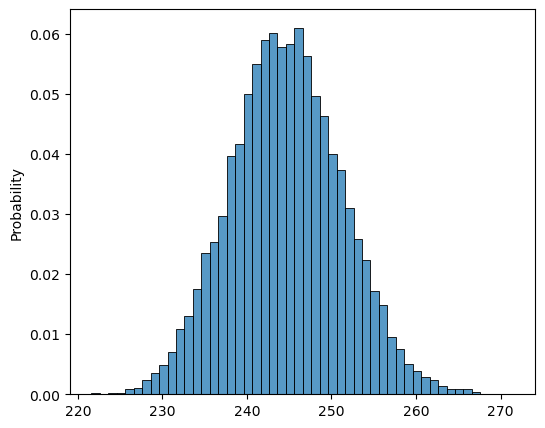

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))
p = sns.histplot(data=distribution, stat='probability', discrete=True, ax=ax)
plt.show()

# Bootstrapping using 'chance' probability

In the above section, we caclulated probability of each average using frequency method. We basically took samples 9999 times and then plotted the frequency of each average obtained.

We can also obtain these probabilities using counting methods.

In [7]:
# Boot strapping through probabilities
from math import comb, factorial
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement

In [8]:
data = [2, 4, 9, 12]
unordered_samplesspace = list(combinations_with_replacement(data, len(data)))
unordered_samplesspace

[(2, 2, 2, 2),
 (2, 2, 2, 4),
 (2, 2, 2, 9),
 (2, 2, 2, 12),
 (2, 2, 4, 4),
 (2, 2, 4, 9),
 (2, 2, 4, 12),
 (2, 2, 9, 9),
 (2, 2, 9, 12),
 (2, 2, 12, 12),
 (2, 4, 4, 4),
 (2, 4, 4, 9),
 (2, 4, 4, 12),
 (2, 4, 9, 9),
 (2, 4, 9, 12),
 (2, 4, 12, 12),
 (2, 9, 9, 9),
 (2, 9, 9, 12),
 (2, 9, 12, 12),
 (2, 12, 12, 12),
 (4, 4, 4, 4),
 (4, 4, 4, 9),
 (4, 4, 4, 12),
 (4, 4, 9, 9),
 (4, 4, 9, 12),
 (4, 4, 12, 12),
 (4, 9, 9, 9),
 (4, 9, 9, 12),
 (4, 9, 12, 12),
 (4, 12, 12, 12),
 (9, 9, 9, 9),
 (9, 9, 9, 12),
 (9, 9, 12, 12),
 (9, 12, 12, 12),
 (12, 12, 12, 12)]

Each unordered sample of the above 35 samples `(n+m-1 C n)` has an average. Sometimes the two different samples can have the same average. For instance `(4, 4, 12, 12)` and `(2, 9, 9, 12)` have the same average of `8`. Hence the probability of getting average `8` is the sum of probabilities of finding both these samples.

**Now how to calculate the probability of picking one of these samples?** *Is it not 1/35?* Obviously, NO!

When you pick four numbers from `(2,4,9,12)` with replacement - there are actually 4^4 (256) ways of doing it. These 256 are ordered samples. And each of these 256 have equal probability.

Each sample from the `unordered sample space` has multiple samples associated in the `ordered sample space`. For instance:
1. `{2,2,2,2}` is only associated  `(2,2,2,2)`
2. `{2,2,2,4}` is associated with `(2,2,2,4); (2,2,4,2); (2,4,2,2); (4,2,2,2)`

etc

Hence, each unordered sample has `n!/(k1!*k2!...)`; where
1. `n - size of unordered sample`
2. `k1, k2....` are reptitions of any number.

In [9]:
means = []
probs = []
for unordered_sample in unordered_samplesspace:
    means.append(np.mean(unordered_sample))
    repetitions = [[x,unordered_sample.count(x)] for x in set(unordered_sample)]
    reptitions_factorials = np.prod([factorial(repetition[1]) for repetition in repetitions])

    num_associated_ordered_samples = factorial(len(unordered_sample))/(reptitions_factorials)
    prob_unordered_sample = (num_associated_ordered_samples)/256
    probs.append(prob_unordered_sample)

In [10]:
df = pd.DataFrame([means, probs]).T
df.columns = ['avg', 'prob']

In [11]:
df = df.groupby('avg')[['prob']].sum().reset_index()
df

,avg,prob
0,2.00,0.003906
1,2.50,0.015625
2,3.00,0.023438
3,3.50,0.015625
4,3.75,0.015625
5,4.00,0.003906
6,4.25,0.046875
7,4.50,0.015625
8,4.75,0.046875
9,5.00,0.046875


In [12]:
df.prob.sum()

1.0

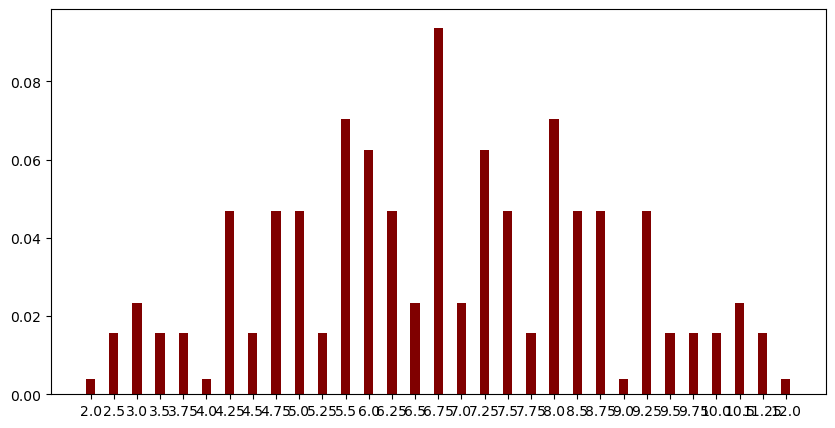

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(df.avg.astype(str), df.prob, color ='maroon',width = 0.4)
plt.show()

References:
1. [StatQuest - Part1](https://www.youtube.com/watch?v=Xz0x-8-cgaQ)
2. [StatQuest - Part2](https://www.youtube.com/watch?v=N4ZQQqyIf6k)
3. [SciPy - Bootstrap](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)
4. `Examples 1.2.20 and A.0.1; Statistical Inference by George Casella and Roger L.Berger.`

# Case Study:

David Glasgow, a Forensic & Clinical Psychologist from the UK, reached out to me with an application of Bootstrapping. 

As part of his work, he has to profile internet offenders from their digital records. Basically, he gets data on suspect's internet history. Each row is a website the suspect has visited. Each of these websites is flagged - either sexual or not. Based on this data, he has to profile if the suspect is an internet offender. Their hypothesis is that the more sexual content a suspect consumes, the more is their propensity to be an internet offender.

Ideally, if David has the entire internet history of a suspect (the population dataset), then he would use it to just calculate the percentage of sexual content in suspect's web history. Then he could use a threshold to classify if the suspect is an internet offender or not. (Say, more than 50% of one's web history).

But, the police may not be successful in retrieving the entire internet history everytime. They may get only a sample internet history (Note - this sample may not be randomly generated - if the police retreive internet history from phone alone, the estimate would be positively biased). Based on this sample internet history, David wants to build a Bootstrapping Confidence Interval.

I asked David if he could share this data, but given that it contains illegal websites, he was afraid that it would land me in trouble. So, I'll work on dummy data based on the summary stats shared.

## Dummy Data

There is a suspect, whose internet history was retrieved by the police. It consists of 780999 URLS that the suspect has visited in his life time. Each URL is either flagged sexual or not. Apparently 44.67% of these URLs are of sexual nature. We'll create a dummy data that is the population dataset. 

In [1]:
import numpy as np

# Define the total number of rows and the number of ones (1 = sexual content)
total_rows = 780999
num_ones = 348872

# Create an array with the desired number of ones and zeros
column = np.zeros(total_rows)
column[:num_ones] = 1

# Shuffle the array to randomize the positions of ones and zeros
np.random.shuffle(column)

In [2]:
# Population - Sexual content
column.mean()

0.44669967567179986

Now, imagine David got access to only 78 records of the suspect's internet history (Not the entire population).

In [3]:
sample = np.random.choice(column, size=78, replace=True)

In [4]:
sample.mean()

0.44871794871794873

Based on these 78 records, he wants to construct a Bootstrapping CI.

In [5]:
from scipy.stats import bootstrap

sample = (sample,)
#calculate 95% bootstrap for mean
bootstraped_percentile = bootstrap(sample, np.mean, confidence_level=0.95,
                         random_state=111, method='percentile')

In [6]:
print(bootstraped_percentile.confidence_interval)

ConfidenceInterval(low=0.3333333333333333, high=0.5641025641025641)


In [7]:
#calculate 95% bootstrap for mean
bootstraped_bca = bootstrap(sample, np.mean, confidence_level=0.95,
                         random_state=111, method='BCa')

In [8]:
print(bootstraped_bca.confidence_interval)

ConfidenceInterval(low=0.3333333333333333, high=0.5641025641025641)


David wants to know how the sample size affects the width of the Bootstrapping CI. 

In [9]:
ci_lows = []
ci_highs = []
means = []
for samplesize in [78, 781, 7810]:
    sample = np.random.choice(column, size=samplesize, replace=False)
    sample = (sample,)
    #calculate 95% bootstrap for mean
    bootstraped_percentile = bootstrap(sample, np.mean, confidence_level=0.95,
                             random_state=111, method='percentile')
    
    mean = bootstraped_percentile.bootstrap_distribution.mean()
    ci_low = bootstraped_percentile.confidence_interval[0]
    ci_high = bootstraped_percentile.confidence_interval[1]
    
    ci_lows.append(ci_low)
    ci_highs.append(ci_high)
    means.append(mean)

In [10]:
import pandas as pd
df = pd.DataFrame([ci_lows, ci_highs, means, [78, 781, 7810]]).T
df.columns = ['ci_low', 'ci_high', 'mean', 'samplesize']

In [11]:
df

,ci_low,ci_high,mean,samplesize
0,0.333333,0.551282,0.436862,78.0
1,0.403329,0.472471,0.438249,781.0
2,0.434571,0.456210,0.445392,7810.0


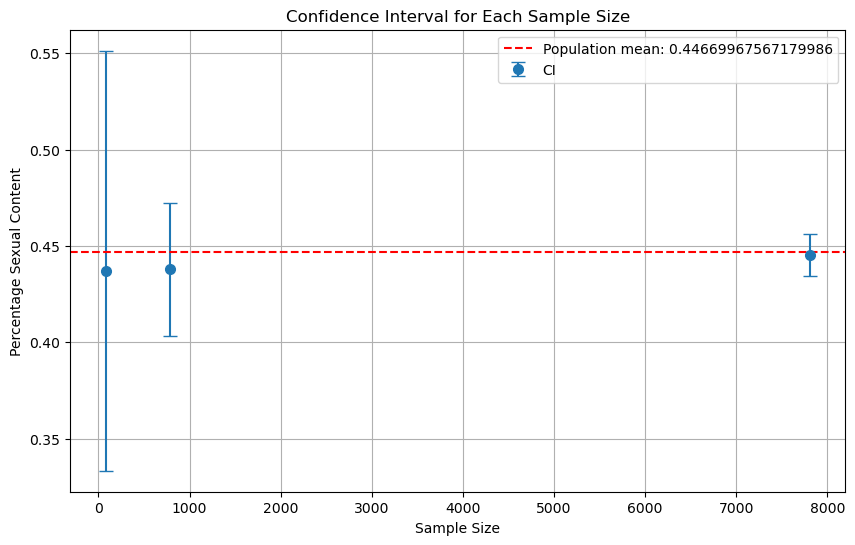

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.errorbar(df['samplesize'], df['mean'], yerr=[df['mean'] - df['ci_low'], df['ci_high'] - df['mean']],
             fmt='o', capsize=5, markersize=7, label='CI')
plt.xlabel('Sample Size')
plt.ylabel('Percentage Sexual Content')
plt.title('Confidence Interval for Each Sample Size')
plt.grid(True)
plt.axhline(y=column.mean(), color='r', linestyle='--', label=f'Population mean: {column.mean()}')
plt.legend()
plt.show()

The width of the CI is reducing with increasing sample size as expected. But this tells us that one must be careful with smaller sample sizes while profiling the suspect.

Caveat:
1. The sample may not be randomly generated in real life. The police, say, extracted the sample only from the phone of the suspect. In general, people might consume more sexual content from their phones. The CI estimated from phone sample would be positively biased.

# Parametric Boostrapping vs Nonparametric Bootstrapping

All the above examples are of non-paramteric bootstrapping. We did not assume the distribution of the data generating process (population). We just took one sample and resampled it. Clearly, when the sample size is small non-parametric bootstrapping is not very effective.

One alternative is that use your sample to estimate parameters of an assumed population distribution. This estimation is mostly done using [MLE](https://www.youtube.com/watch?v=XepXtl9YKwc) but Method of Moments is also good. Once the estimation is done, construct the distribution and then draw 9999 samples from this distribution. This is parametric Bootsrapping. 